#*Natural Language Processing* is a subfield of AI and computer science which uses machine learning to enable computers to understand and communicate with human language.

---
###nltk - NLP toolkit

---
##Package installation for offline machines
###conda install nltk or
###pip install nltk
###import nltk

---
###Website for popular datasets for practical - https://archive.ics.uci.edu/

---

In [ ]:
import pandas as pd


In [ ]:
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label', 'messages'])
## sep = '\t' - tab seperated values in dataset

In [ ]:
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##EDA

In [ ]:
messages.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
messages.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [ ]:
messages['length'] = messages['messages'].apply(len)
# A new column created as Length. For every column apply(len) function will be applied.

In [ ]:
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


---
#Data Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

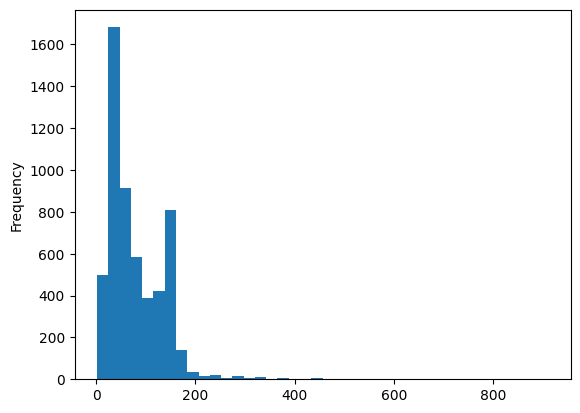

In [ ]:
messages['length'].plot(kind='hist', bins=40)

In [ ]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
messages[messages['length']==2]['messages'].iloc[0]

'Ok'

In [ ]:
messages[messages['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

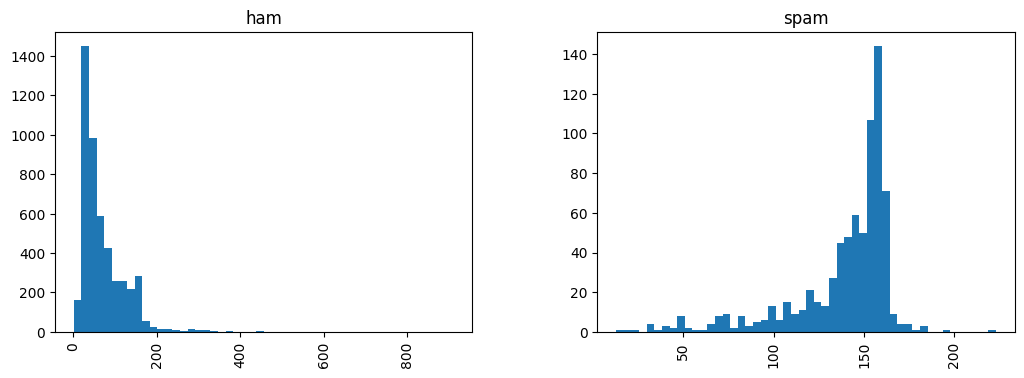

In [ ]:
messages.hist(column='length', by='label', bins=50, figsize=(12,4))
# figsize=(12,4) is a good dimension to use as it fits the screen properly

#Text Preprocessing

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
import string
msg = "Hi!! Vishakha is learning NLP in AI"
nopunc = [char for char in msg if char not in string.punctuation]
nopunc = ''.join(nopunc)
nopunc

'Hi Vishakha is learning NLP in AI'

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')[0:11]
# corpus - collection of data

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've"]

In [ ]:
nopunc.split()

['Hi', 'Vishakha', 'is', 'learning', 'NLP', 'in', 'AI']

In [ ]:
clean_msg = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_msg

['Hi', 'Vishakha', 'learning', 'NLP', 'AI']

In [ ]:
def text_process(msg):
  '''Take the string from messages
  1. remove all punctuation
  2. remove the stopwords
  3. return a list of cleaned text '''

  nopunc = [char for char in msg if char not in string.punctuation]

  nopunc = ''.join(nopunc)

  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
text_process("Go!! Ronaldo Goo!!%$&     ''""/              m*ke it")

['Go', 'Ronaldo', 'Goo', 'mke']

In [ ]:
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
messages['messages'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

##Vectorisation



###what is lemmas? raw data collection
###lemmas = [Go, jurong, point, crazy, Available, bugis]

###3 steps to convert lemmas into vectors
1.   Count the ocurrence of word in each msg
2.   Inverse Document Frequency (IDF)








In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# STEP 1
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['messages'])

In [ ]:
len(bow_transformer.vocabulary_)
# 11425 - total no of vocabulary words

11425

In [ ]:
msg4 = messages['messages'][3]

In [ ]:
msg4

'U dun say so early hor... U c already then say...'

In [ ]:
bow4 = bow_transformer.transform([msg4])
print(bow_transformer.transform([msg4]))

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [ ]:
print(bow_transformer.get_feature_names_out()[9554])
print(bow_transformer.get_feature_names_out()[5261])

say
c


In [ ]:
msg_bow = bow_transformer.transform(messages['messages'])
msg_bow.shape
# output - (row, column)

(5572, 11425)

In [ ]:
#checking messages having non zero occurences
msg_bow.nnz

50548

##What is TF-IDF?
TF - Term Frequency - How frequently a term occurs in a document <br>
Term - unique word <br>
Document - message <br>

If term occurs multiple times  - lower weighed
If term occurs less time - high weighed <br>

TF = (Number of times term occurs in a document) / (Total number of terms in a document) <br>
100 words in a msg, cat occurs 3 times <br>
**TF = 3/100 = 0.03**


IDF - Inverse Document Frequency <br>
IDF = log(base e)(Total no of documents / No of documents with term t in it) <br>
100000 documents, cat occurs in 1000 documents <br>
**IDF = log_e(100000/1000) = 4.6052** <br>


Calculating TF IDF together <br>
**TF-IDF = 0.03*4.6 = 0.13**


In [ ]:
#STEP 2
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer().fit(msg_bow)

In [ ]:
tfidf4 = tfidf_transformer.transform(bow4)

In [ ]:
#getting tf-idf value
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [ ]:
#getting only idf value
tfidf_transformer.idf_[bow_transformer.vocabulary_['say']]

5.231239632897098

In [ ]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['ok']]

4.863514852771781

In [ ]:
msgs_tfidf = tfidf_transformer.transform(msg_bow)

In [ ]:
msgs_tfidf.shape

(5572, 11425)

In [ ]:
# Now our machine will understand the messages and its importance and we can train our model

##Train the model - wrong way
Now machine can understand the english terms with the importance in a message compared to the whole dataset because of tfidf values

In [ ]:
  from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detector = MultinomialNB().fit(msgs_tfidf, messages['label'])

##Lets try some random message and put into ML model and check

In [ ]:
# Never use whole training set as done below this is just for practical
print('Predicted', spam_detector.predict(tfidf4))
print('Expected', messages.label[4])

Predicted ['ham']
Expected ham


In [ ]:
all_predictions = spam_detector.predict(msgs_tfidf)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [ ]:
confusion_matrix(messages['label'], all_predictions)

array([[4825,    0],
       [ 115,  632]])

##Train Test Split - right way

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['messages'], messages['label'], test_size = 0.2)

In [ ]:
len(msg_train)

4457

In [ ]:
len(msg_test)

1115

##Creating Data Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
#estimator - machine learning model
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [ ]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7c5efe981fc0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1001
        spam       0.74      1.00      0.85       114

    accuracy                           0.96      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115



In [ ]:
confusion_matrix(predictions, label_test)

array([[960,  41],
       [  0, 114]])